In [2]:
pip install scikit-learn pandas numpy

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [4]:
data = pd.read_csv(r'C:\Users\psara\anaconda3\play_tennis.csv')
# Print the entire DataFrame
print(data.to_string()) 
# Separate features and target
X = data.drop('play', axis=1)
y = data['play']

    day   outlook  temp humidity    wind play
0    D1     Sunny   Hot     High    Weak   No
1    D2     Sunny   Hot     High  Strong   No
2    D3  Overcast   Hot     High    Weak  Yes
3    D4      Rain  Mild     High    Weak  Yes
4    D5      Rain  Cool   Normal    Weak  Yes
5    D6      Rain  Cool   Normal  Strong   No
6    D7  Overcast  Cool   Normal  Strong  Yes
7    D8     Sunny  Mild     High    Weak   No
8    D9     Sunny  Cool   Normal    Weak  Yes
9   D10      Rain  Mild   Normal    Weak  Yes
10  D11     Sunny  Mild   Normal  Strong  Yes
11  D12  Overcast  Mild     High  Strong  Yes
12  D13  Overcast   Hot   Normal    Weak  Yes
13  D14      Rain  Mild     High  Strong   No


In [5]:
# Drop the 'day' column as it's not needed for encoding
df_without_day = X.drop('day', axis=1)
# Convert categorical features into numerical format
# One-Hot Encode the categorical features
X = pd.get_dummies(df_without_day, drop_first=True)
print(X)
# Normalize or scale features if needed (optional)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

    outlook_Rain  outlook_Sunny  temp_Hot  temp_Mild  humidity_Normal  \
0              0              1         1          0                0   
1              0              1         1          0                0   
2              0              0         1          0                0   
3              1              0         0          1                0   
4              1              0         0          0                1   
5              1              0         0          0                1   
6              0              0         0          0                1   
7              0              1         0          1                0   
8              0              1         0          0                1   
9              1              0         0          1                1   
10             0              1         0          1                1   
11             0              0         0          1                0   
12             0              0         1          

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Classification
# Train decision tree with ID3 (information gain - entropy)
id3_model = DecisionTreeClassifier(criterion='entropy')  # Using 'entropy' criterion for ID3
id3_model.fit(X_train, y_train)
# Train decision tree using entropy (like ID3) with pruning (simulating C4.5)
# Scikit-learn doesn't directly support C4.5, but you can simulate it by handling continuous features and pruning manually
c45_model = DecisionTreeClassifier(criterion='entropy', min_samples_split=4, max_depth=3)  # Add pruning by limiting depth or min samples
c45_model.fit(X_train, y_train)
# Train decision tree with CART (Gini impurity)
cartclassifier_model = DecisionTreeClassifier(criterion='gini')  # Default is Gini for CART
cartclassifier_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
#Regression
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
cartregressor_model = DecisionTreeRegressor()  # For regression with MSE
cartregressor_model.fit(X_train, y_train_encoded)

DecisionTreeRegressor()

In [65]:
y_pred_id3_model = id3_model.predict(X_test)
y_pred_c45_model = c45_model.predict(X_test)
y_pred_cartclassifier_model = cartclassifier_model.predict(X_test)
y_pred_cartregressor_model = cartregressor_model.predict(X_test)

In [66]:
accuracyid3_model = accuracy_score(y_test, y_pred_id3_model)
print(f'Accuracy_id3: {accuracyid3_model:.2f}')

Accuracy_id3: 0.67


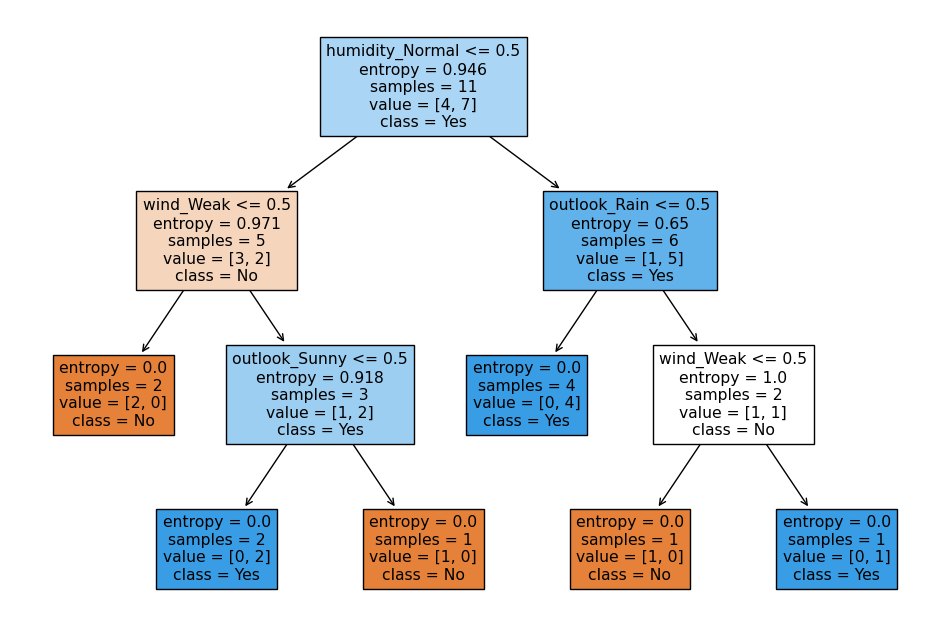

In [67]:
# Visualize the Decision Tree (Optional)
import matplotlib.pyplot as plt
from sklearn import tree
# Convert feature names and class names to lists
feature_names = list(X.columns)
class_names = list(label_encoder.classes_)  # Convert array to list
# Plot the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(id3_model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

Accuracy_c45: 1.00


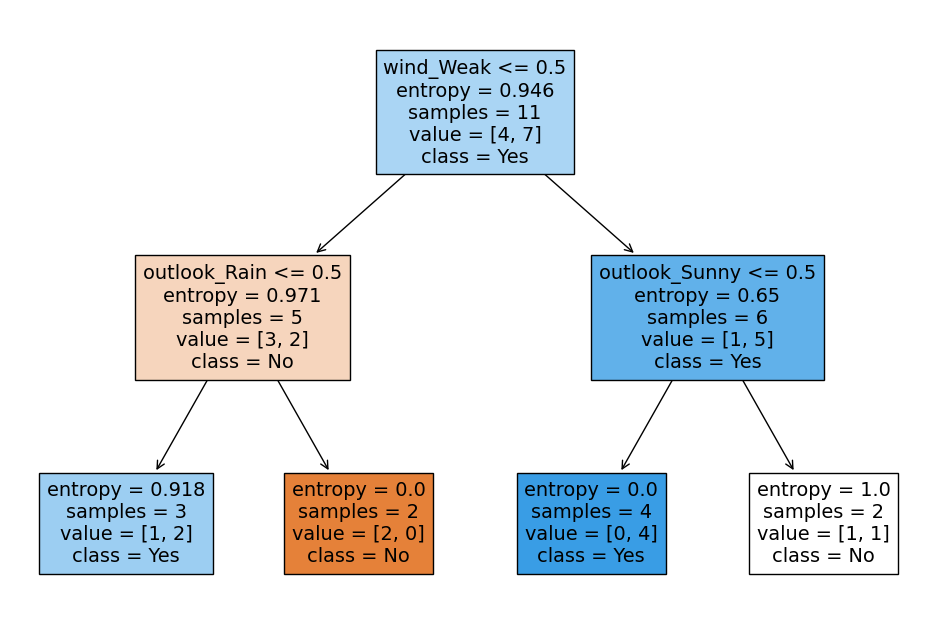

In [68]:
accuracyc45_model = accuracy_score(y_test, y_pred_c45_model)
print(f'Accuracy_c45: {accuracyc45_model:.2f}')
# Plot the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(c45_model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

Accuracy_cartclassifier: 0.67


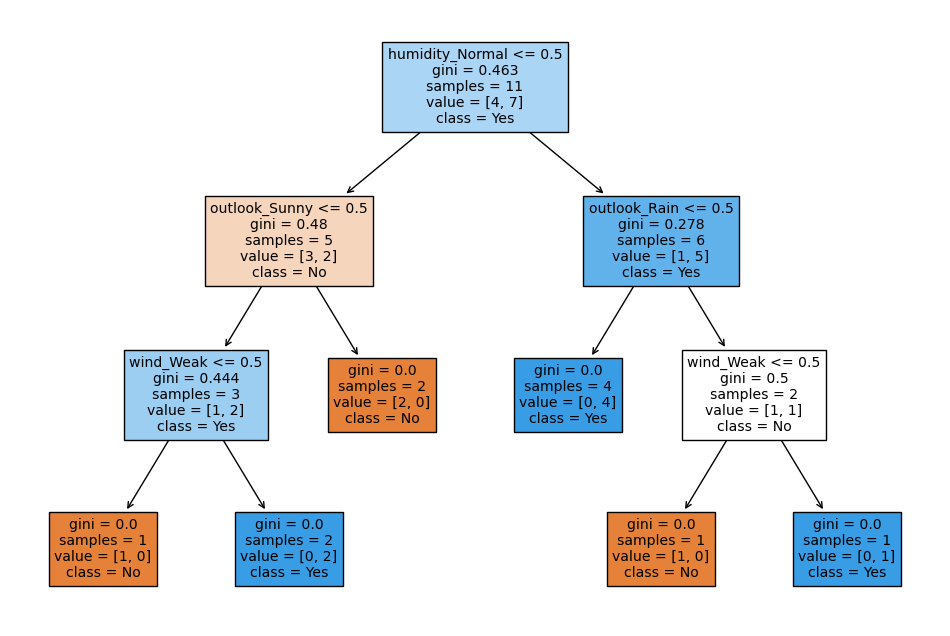

In [69]:
accuracycartclassifier_model = accuracy_score(y_test, y_pred_cartclassifier_model)
print(f'Accuracy_cartclassifier: {accuracycartclassifier_model:.2f}')
# Plot the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(cartclassifier_model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

Mean Squared Error_cartregressor: 0.67


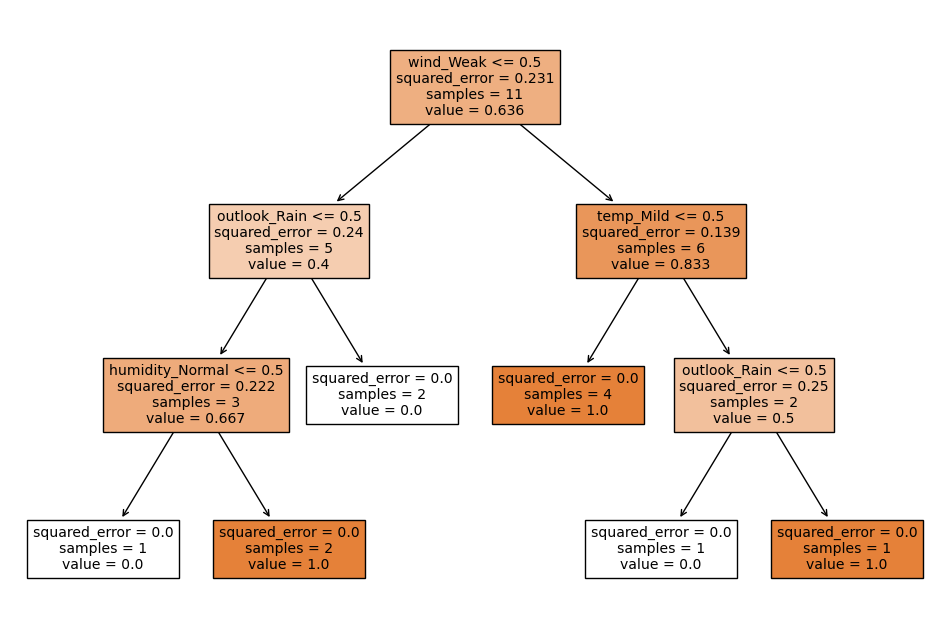

In [70]:
# Calculate Mean Squared Error
mse_cartregressor_model = mean_squared_error(y_test_encoded, y_pred_cartregressor_model)
print(f'Mean Squared Error_cartregressor: {mse_cartregressor_model:.2f}')
# Plot the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(cartregressor_model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [71]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6, 8, 10],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {grid_search.best_params_}')


C:\Users\psara\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_split': 10}


Accuracy_c45: 1.00


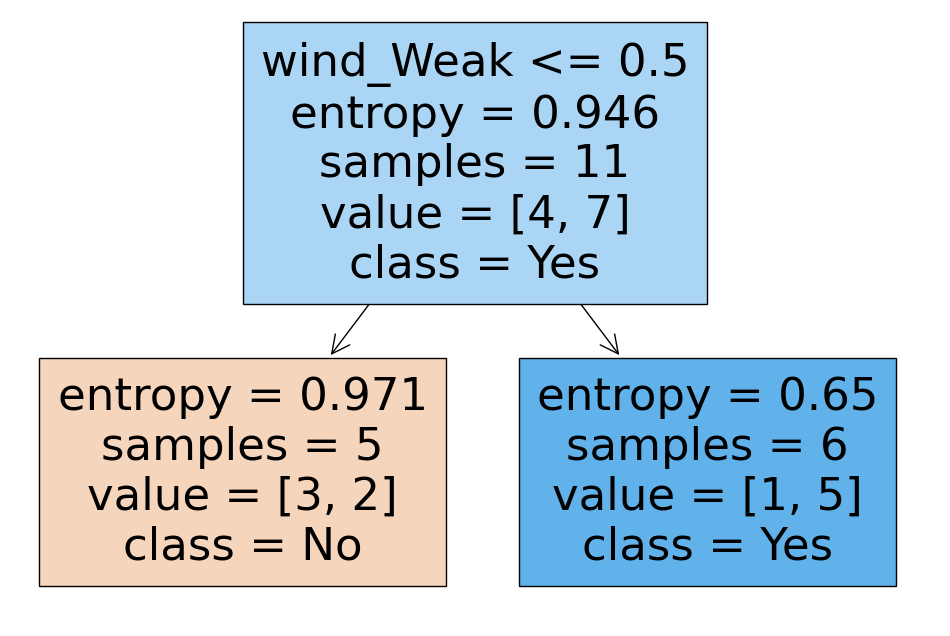

In [72]:
c45_model_tune = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, max_depth=None)  # Add pruning by limiting depth or min samples
c45_model_tune.fit(X_train, y_train)
y_pred_c45_model_tun = c45_model_tune.predict(X_test)
accuracyc45_model_tun = accuracy_score(y_test, y_pred_c45_model)
print(f'Accuracy_c45: {accuracyc45_model_tun:.2f}')
# Plot the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(c45_model_tune, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [74]:
# Save the Model (Optional)
import joblib
joblib.dump(id3_model, 'playtennis_id3_model.pkl')
joblib.dump(c45_model, 'playtennis_c45_model.pkl')
joblib.dump(cartclassifier_model, 'playtennis_cartclassifier_model.pkl')
joblib.dump(cartregressor_model, 'playtennis_cartregressor_model.pkl')
# Load the model
id3_model = joblib.load('playtennis_id3_model.pkl')
c45_model = joblib.load('playtennis_c45_model.pkl')
cartclassifier_model = joblib.load('playtennis_cartclassifier_model.pkl')
cartregressor_model = joblib.load('playtennis_cartregressor_model.pkl')

In [77]:
# Monitor and Maintain
# Regularly update and monitor your model as new data becomes available.
# Step 11: Monitor and maintain (optional, ongoing)

In [9]:
X_new=[1,0,1,0]
y=id3_model.predict(X_new)
print(y)

C:\Users\psara\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.